# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d200/7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Toronto, Ontario, Canada**, and the stations the data comes from are shown on the map below.

In [3]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(200,'7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef')

FileNotFoundError: File b'data/C2A2_data/BinSize_d200.csv' does not exist

In [9]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

# def leaflet_plot_stations(file):

#     df = pd.read_csv('{0}'.format(file))

#     station_locations_by_hash = df[df['hash'] == "7037ec05b97576da1bd9db5e3ea6a322a577bc833b0dc772238248ef"]

#     lons = station_locations_by_hash['LONGITUDE'].tolist()
#     lats = station_locations_by_hash['LATITUDE'].tolist()

#     plt.figure(figsize=(8,8))

#     plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

#     return mplleaflet.display()

# leaflet_plot_stations("weather_data.csv")

In [4]:
!python -m pip install --upgrade pip

  Found existing installation: pip 10.0.1
    Uninstalling pip-10.0.1:
      Successfully uninstalled pip-10.0.1


In [5]:
!pip install mplleaflet

In [12]:
df = pd.read_csv("weather_data.csv")

df = df.sort_values(by=["Date"])

current_date = ""
a = []


for i in df["Date"]:
    if current_date ==  i:
        continue
    else:
        current_date = i
        df1 = df.loc[(df["Date"] == current_date)]["Data_Value"]/10
        temp_max = df1.max()
        temp_min = df1.min()
        b = {"Date" : current_date, "Max Temp" : temp_max, "Min Temp" : temp_min}
        a.append(b)

c = pd.DataFrame(a)
c = c[["Date", "Max Temp", "Min Temp"]]



In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


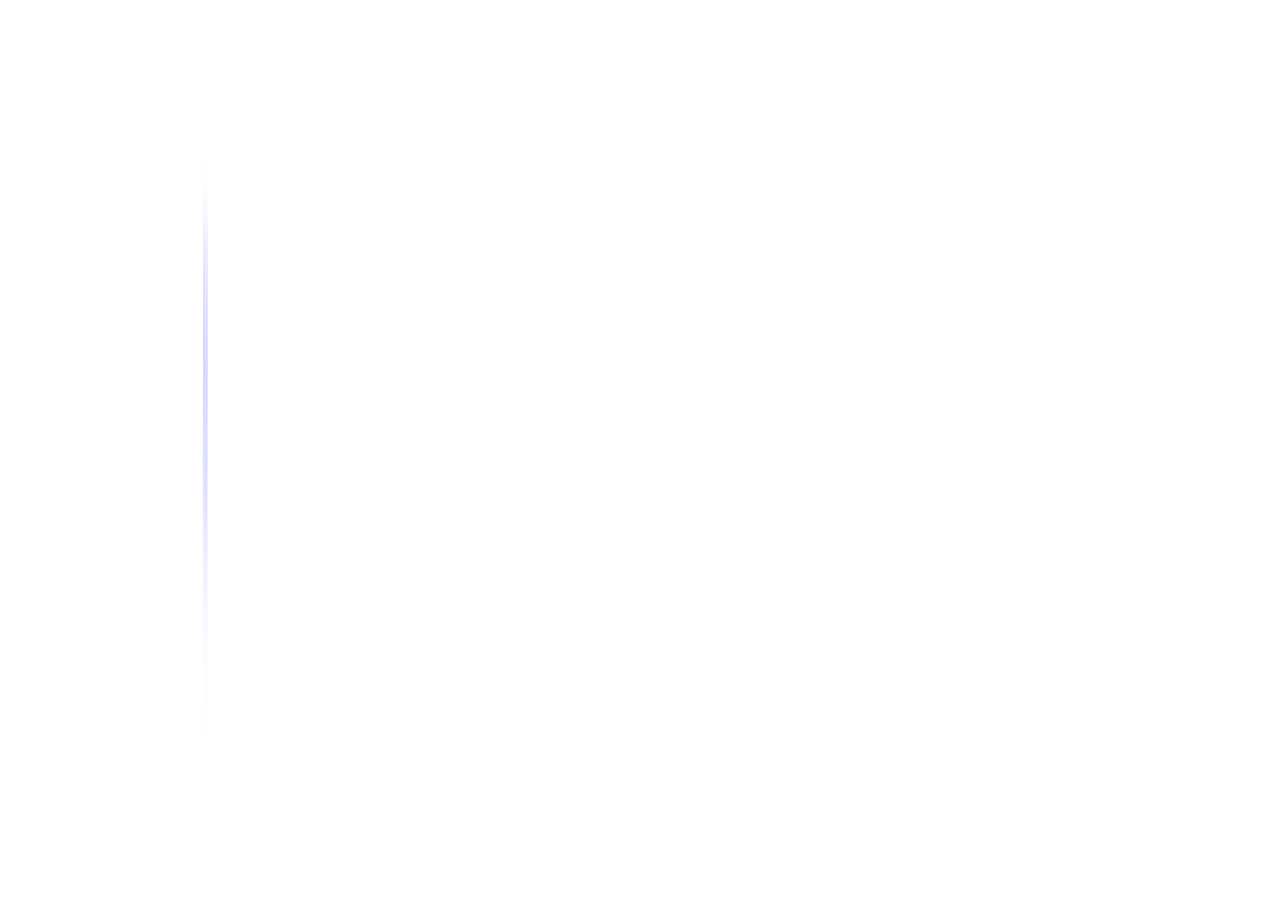

In [26]:
#linear_data = np.array([1,2,3,4,5,6,7,8])
max_data = c["Max Temp"]
min_data = c["Min Temp"]
dates = pd.to_datetime(c['Date'])
observation_dates = dates
observation_dates = list(dates)

dates = pd.to_datetime(c['Date'], format = "%Y/%m/%d", )
x_axis = dates

plt.figure()
# plot the linear data and the exponential data
plt.plot(x_axis, max_data, '-', x_axis, min_data, '-')

plt.legend(['Max Temp', 'Min Temp'])

degree_sign= u'\N{DEGREE SIGN}'

#plt.xlabel('Days')
plt.ylabel('Temperature ({0}C)'.format(degree_sign))
plt.title('A title')

# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(max_data)), 
                       max_data, min_data, 
                       facecolor='blue', 
                       alpha=0.25)

#observation_dates = np.arange('2005-01-01', '2014-12-31', dtype='datetime64[D]')

In [19]:
import matplotlib.dates as dates
dates = c['Date']
#dates = list(dates)

new_x = dates.datestr2num(dates)

AttributeError: 'Series' object has no attribute 'datestr2num'

In [25]:
import datetime as dt

dates = pd.to_datetime(c['Date'], format = "%Y/%m/%d", )
#x = [dt.datetime.strptime(d,'%Y/%m/%d').date() for d in dates]
dates

0      2005-01-01
1      2005-01-02
2      2005-01-03
3      2005-01-04
4      2005-01-05
5      2005-01-06
6      2005-01-07
7      2005-01-08
8      2005-01-09
9      2005-01-10
10     2005-01-11
11     2005-01-12
12     2005-01-13
13     2005-01-14
14     2005-01-15
15     2005-01-16
16     2005-01-17
17     2005-01-18
18     2005-01-19
19     2005-01-20
20     2005-01-21
21     2005-01-22
22     2005-01-23
23     2005-01-24
24     2005-01-25
25     2005-01-26
26     2005-01-27
27     2005-01-28
28     2005-01-29
29     2005-01-30
          ...    
3987   2015-12-02
3988   2015-12-03
3989   2015-12-04
3990   2015-12-05
3991   2015-12-06
3992   2015-12-07
3993   2015-12-08
3994   2015-12-09
3995   2015-12-10
3996   2015-12-11
3997   2015-12-12
3998   2015-12-13
3999   2015-12-14
4000   2015-12-15
4001   2015-12-16
4002   2015-12-17
4003   2015-12-18
4004   2015-12-19
4005   2015-12-20
4006   2015-12-21
4007   2015-12-22
4008   2015-12-23
4009   2015-12-24
4010   2015-12-25
4011   201

In [21]:
c["Date"]

0       2005-01-01
1       2005-01-02
2       2005-01-03
3       2005-01-04
4       2005-01-05
5       2005-01-06
6       2005-01-07
7       2005-01-08
8       2005-01-09
9       2005-01-10
10      2005-01-11
11      2005-01-12
12      2005-01-13
13      2005-01-14
14      2005-01-15
15      2005-01-16
16      2005-01-17
17      2005-01-18
18      2005-01-19
19      2005-01-20
20      2005-01-21
21      2005-01-22
22      2005-01-23
23      2005-01-24
24      2005-01-25
25      2005-01-26
26      2005-01-27
27      2005-01-28
28      2005-01-29
29      2005-01-30
           ...    
3987    2015-12-02
3988    2015-12-03
3989    2015-12-04
3990    2015-12-05
3991    2015-12-06
3992    2015-12-07
3993    2015-12-08
3994    2015-12-09
3995    2015-12-10
3996    2015-12-11
3997    2015-12-12
3998    2015-12-13
3999    2015-12-14
4000    2015-12-15
4001    2015-12-16
4002    2015-12-17
4003    2015-12-18
4004    2015-12-19
4005    2015-12-20
4006    2015-12-21
4007    2015-12-22
4008    2015